In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

ImportError: No module named matplotlib

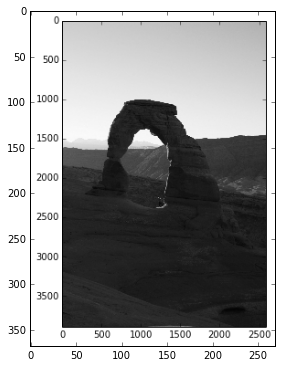

In [5]:
#Convert a JPEG image to black and white
img = Image.open('C:/test/image-test.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

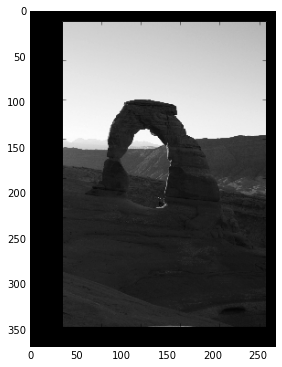

In [6]:
# Convert the image data into a numpy matrix, plotting the result to show the data is unchanged
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [7]:
# Compute the singular value decomposition
U, sigma, V = np.linalg.svd(imgmat)

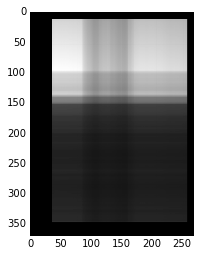

In [8]:
# Computing an approximation of the image using the first column of U and first row of V  
# reproduces the most prominent feature of the image, the light area on top and the dark area on the bottom. 
# The darkness of the arch causes the extra darkness in the middle of the reconstruction. 
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

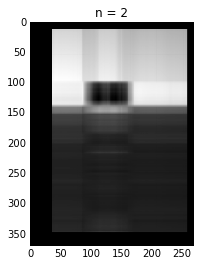

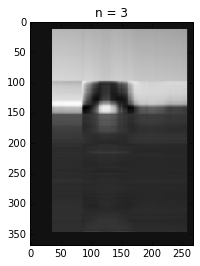

In [11]:
# Even with just the second and third vectors, the shape of the arch begins to appear
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

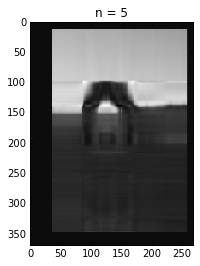

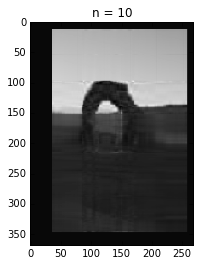

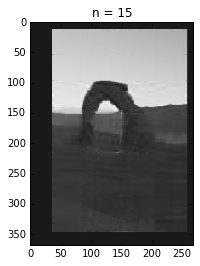

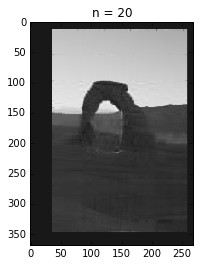

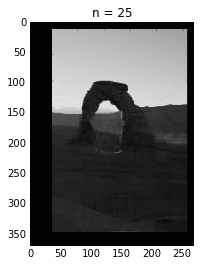

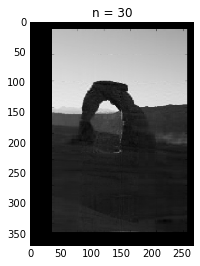

In [13]:
# The first 30 vectors produce an image very close the original image, 
# while taking up only 3.2% of teh original data
for i in range(5, 31, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()